## 3. Boyutta Işınlama

In [1]:
from cmath import exp
from math import pi, pow

import cirq
import numpy as np
from cirq import protocols
from matplotlib import pyplot

In [2]:
# complex 0 + 1i
Imag = complex(0, 1)

A = 2 * pi * Imag / 3
B = 4 * pi * Imag / 3

In [3]:
Unitaries = [
    [
        [np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=complex)],
        [np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]], dtype=complex)],
        [np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]], dtype=complex)]
    ],
    [
        [np.array([[1, 0, 0], [0, A, 0], [0, 0, B]], dtype=complex)],
        [np.array([[0, 0, B], [1, 0, 0], [0, A, 0]], dtype=complex)],
        [np.array([[0, A, 0], [0, 0, B], [1, 0, 0]], dtype=complex)]
    ],
    [
        [np.array([[1, 0, 0], [0, B, 0], [0, 0, A]], dtype=complex)],
        [np.array([[0, 0, A], [1, 0, 0], [0, B, 0]], dtype=complex)],
        [np.array([[0, B, 0], [0, 0, A], [1, 0, 0]], dtype=complex)]
    ]
]

In [4]:
class CustomUGate(cirq.Gate):
    def __init__(self, unitary_matrix):
        self.unitary_matrix = unitary_matrix
        super().__init__()

    def _qid_shape_(self):
        return 3,
    
    def _num_qubits_():
        return 1

    def _unitary_(self):
        return self.unitary_matrix

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'U'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [5]:
class QutritIdle(cirq.Gate):
    def _qid_shape_(self):
        return 3,

    @staticmethod
    def _unitary_():
        return Unitaries[0][0][0]

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'I'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [7]:
class QutritHadamard(cirq.Gate):
    def _qid_shape_(self):
        return 3,

    @staticmethod
    def _unitary_():
        arr = np.array([
            [1, 1, 1],
            [1, exp(A), exp(B)],
            [1, exp(B), exp(A)]
        ], dtype=complex)
        arr *= 1 / pow(3, 0.5)
        return arr

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'H'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [8]:
class QutritHadamardHermitik(cirq.Gate):
    def _qid_shape_(self):
        return 3,

    @staticmethod
    def _unitary_():
        return QutritHadamard().transform_matrix.conjugate().T

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'Ht'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [9]:
class QutritCNOT(cirq.Gate):
    def _qid_shape_(self):
        return 3, 3,
    
    def _num_qubits_(self):
        return 2

    @staticmethod
    def _unitary_():
        arr = np.array([
            [1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 1],
            [0, 0, 0, 0, 0, 0, 1, 0, 0]
        ], dtype=complex)
        return arr

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    @staticmethod
    def _circuit_diagram_info_(args):
        return protocols.CircuitDiagramInfo(
            wire_symbols=('@', 'X'))

    def __str__(self):
        return str(self._unitary_())

In [29]:
class QutritCNOTHermitik(cirq.Gate):
    def _qid_shape_(self):
        return 3, 3,
    
    def _num_qubits_():
        return 2

    @staticmethod
    def _unitary_():
        return QutritCNOT().transform_matrix.conjugate().T

    @staticmethod
    def _circuit_diagram_info_(args):
        return protocols.CircuitDiagramInfo(
            wire_symbols=('@\'', 'X'))

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [42]:
class ZGate(cirq.Gate):
    def __init__(self, q, p):
        self.p = p
        self.q = q
        super().__init__()
    
    def _qid_shape_(self):
        return 3,
    
    def _num_qubits_(self):
        return 1
    
    def _unitary_(self):
        if self.q == 0:
            a = -A
            b = -B
        else:
            a = -B
            b = -a
        if self.p == 0:
            self.unitary_matrix = np.array([[1, 0, 0], [0, exp(a), 0], [0, 0, exp(b)]])
        if self.p == 1:
            self.unitary_matrix = np.array([[0, 1, 0], [0, 0, exp(a)], [exp(b), 0, 0]])
        if self.p == 2:
            self.unitary_matrix = np.array([[0, 0, 1], [exp(a), 0, 0], [0, exp(b), 0]])
        return self.unitary_matrix
    
    @staticmethod
    def _circuit_diagram_info_(args):
        return 'Z'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

In [45]:
def teleportation_test(durum, shots):
    qI, qA, qB = cirq.LineQid.range(3, dimension=3)
    simulator = cirq.Simulator()
    
    # Başlangıç durumu seç
    if durum == "0":
        first = QutritIdle()
    elif durum == "1":
        first = CustomUGate(Unitaries[0][1][0])
    elif durum == "2":
        first = CustomUGate(Unitaries[0][2][0])
    elif durum == "hepsi":
        first = QutritHadamard()
    else:
        return
    
    # Devreyi tasarla.
    circuit = cirq.Circuit()
    circuit.append(first.on(qI))
    circuit.append(QutritHadamard().on(qA))
    circuit.append(QutritCNOT().on(qA, qB))
    circuit.append(QutritCNOTHermitik().on(qI, qA))
    circuit.append(QutritHadamard().on(qI)) 
    
    num_controls = 2
    qid_shape = (3, ) * num_controls
    values = ((0), (1))
    cont = CustomUGate(Unitaries[0][2][0]).controlled(num_controls, values, qid_shape)
    circuit.append(cont.on(qI, qA, qB))
    
    num_controls = 2
    qid_shape = (3, ) * num_controls
    values = ((0), (2))
    cont = CustomUGate(Unitaries[0][1][0]).controlled(num_controls, values, qid_shape)
    circuit.append(cont.on(qI, qA, qB))
    
    num_controls = 2
    qid_shape = (3, ) * num_controls
    values = ((1), (0))
    cont = ZGate(0, 0).controlled(num_controls, values, qid_shape)
    circuit.append(cont.on(qI, qA, qB))
    
    num_controls = 2
    qid_shape = (3, ) * num_controls
    values = ((1), (1))
    cont = ZGate(0, 1).controlled(num_controls, values, qid_shape)
    circuit.append(cont.on(qI, qA, qB))
    
    num_controls = 2
    qid_shape = (3, ) * num_controls
    values = ((1), (2))
    cont = ZGate(0, 2).controlled(num_controls, values, qid_shape)
    circuit.append(cont.on(qI, qA, qB))
    
    num_controls = 2
    qid_shape = (3, ) * num_controls
    values = ((2), (0))
    cont = ZGate(1, 0).controlled(num_controls, values, qid_shape)
    circuit.append(cont.on(qI, qA, qB))
    
    num_controls = 2
    qid_shape = (3, ) * num_controls
    values = ((2), (1))
    cont = ZGate(1, 1).controlled(num_controls, values, qid_shape)
    circuit.append(cont.on(qI, qA, qB))
    
    num_controls = 2
    qid_shape = (3, ) * num_controls
    values = ((2), (2))
    cont = ZGate(1, 2).controlled(num_controls, values, qid_shape)
    circuit.append(cont.on(qI, qA, qB))
    
    
    circuit.append(cirq.measure(qB, key='qB'))
    print(circuit)
    
    # Simüle et ve sonuçları döndür.
    result = simulator.run(circuit, repetitions=shots)
    unique, counts = np.unique(result.measurements['qB'], return_counts=True)
    new = dict(zip(unique, counts))
    return new

0 (d=3): ───I───────@'───H───(0)───(0)───@─────@───@─────(2)───(2)───(2)─────────────
                    │        │     │     │     │   │     │     │     │
1 (d=3): ───H───@───X────────@─────(2)───(0)───@───(2)───(0)───@─────(2)─────────────
                │            │     │     │     │   │     │     │     │
2 (d=3): ───────X────────────U─────U─────Z─────Z───Z─────Z─────Z─────Z─────M('qB')───


Text(0, 0.5, 'Adet')

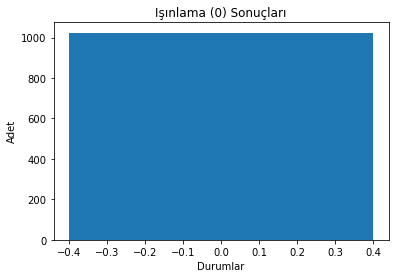

In [46]:
results = teleportation_test(durum="0", shots=1024)
pyplot.bar(results.keys(), results.values())
pyplot.title("Işınlama (0) Sonuçları")
pyplot.xlabel("Durumlar")
pyplot.ylabel("Adet")

0 (d=3): ───U───────@'───H───(0)───(0)───@─────@───@─────(2)───(2)───(2)─────────────
                    │        │     │     │     │   │     │     │     │
1 (d=3): ───H───@───X────────@─────(2)───(0)───@───(2)───(0)───@─────(2)─────────────
                │            │     │     │     │   │     │     │     │
2 (d=3): ───────X────────────U─────U─────Z─────Z───Z─────Z─────Z─────Z─────M('qB')───


Text(0, 0.5, 'Adet')

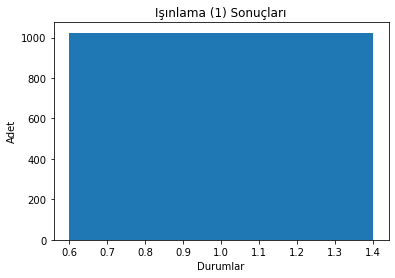

In [47]:
results = teleportation_test(durum="1", shots=1024)
pyplot.bar(results.keys(), results.values())
pyplot.title("Işınlama (1) Sonuçları")
pyplot.xlabel("Durumlar")
pyplot.ylabel("Adet")

0 (d=3): ───U───────@'───H───(0)───(0)───@─────@───@─────(2)───(2)───(2)─────────────
                    │        │     │     │     │   │     │     │     │
1 (d=3): ───H───@───X────────@─────(2)───(0)───@───(2)───(0)───@─────(2)─────────────
                │            │     │     │     │   │     │     │     │
2 (d=3): ───────X────────────U─────U─────Z─────Z───Z─────Z─────Z─────Z─────M('qB')───


Text(0, 0.5, 'Adet')

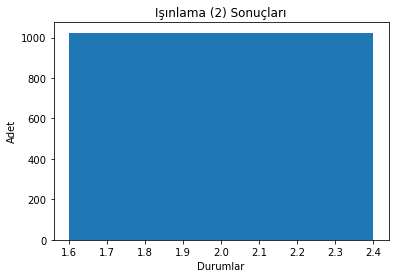

In [48]:
results = teleportation_test(durum="2", shots=1024)
pyplot.bar(results.keys(), results.values())
pyplot.title("Işınlama (2) Sonuçları")
pyplot.xlabel("Durumlar")
pyplot.ylabel("Adet")

0 (d=3): ───H───────@'───H───(0)───(0)───@─────@───@─────(2)───(2)───(2)─────────────
                    │        │     │     │     │   │     │     │     │
1 (d=3): ───H───@───X────────@─────(2)───(0)───@───(2)───(0)───@─────(2)─────────────
                │            │     │     │     │   │     │     │     │
2 (d=3): ───────X────────────U─────U─────Z─────Z───Z─────Z─────Z─────Z─────M('qB')───


Text(0, 0.5, 'Adet')

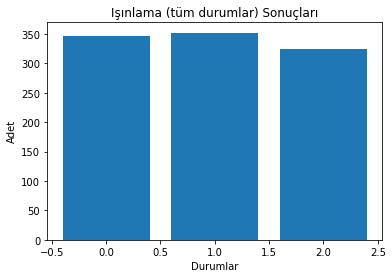

In [49]:
results = teleportation_test(durum="hepsi", shots=1024)
pyplot.bar(results.keys(), results.values())
pyplot.title("Işınlama (tüm durumlar) Sonuçları")
pyplot.xlabel("Durumlar")
pyplot.ylabel("Adet")

## 4. Boyutta Işınlama

In [16]:
from cmath import exp
from math import pi, pow

import cirq
import numpy as np
from cirq import protocols
from matplotlib import pyplot

In [17]:
# complex 0 + 1i
Imag = complex(0, 1)

A = (2 * pi * Imag / 4)
B = (4 * pi * Imag / 4)
C = (6 * pi * Imag / 4)
D = (8 * pi * Imag / 4)
E = (12 * pi * Imag / 4)
F = (18 * pi * Imag / 4)

In [18]:
Unitaries = [
    [
        [np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], dtype=complex)],
        [np.array([[0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]], dtype=complex)],
        [np.array([[0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0]], dtype=complex)],
        [np.array([[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]], dtype=complex)]
    ],
    [
        [np.array([[1, 0, 0, 0], [0, A, 0, 0], [0, 0, B, 0], [0, 0, 0, C]], dtype=complex)],
        [np.array([[0, 0, 0, C], [1, 0, 0, 0], [0, A, 0, 0], [0, 0, B, 0]], dtype=complex)],
        [np.array([[0, 0, B, 0], [0, 0, 0, C], [1, 0, 0, 0], [0, A, 0, 0]], dtype=complex)],
        [np.array([[0, A, 0, 0], [0, 0, B, 0], [0, 0, 0, C], [1, 0, 0, 0]], dtype=complex)]
    ],
    [
        [np.array([[1, 0, 0, 0], [0, B, 0, 0], [0, 0, D, 0], [0, 0, 0, E]], dtype=complex)],
        [np.array([[0, 0, 0, E], [1, 0, 0, 0], [0, B, 0, 0], [0, 0, D, 0]], dtype=complex)],
        [np.array([[0, 0, D, 0], [0, 0, 0, E], [1, 0, 0, 0], [0, B, 0, 0]], dtype=complex)],
        [np.array([[0, B, 0, 0], [0, 0, D, 0], [0, 0, 0, E], [1, 0, 0, 0]], dtype=complex)]

    ],
    [
        [np.array([[1, 0, 0, 0], [0, C, 0, 0], [0, 0, E, 0], [0, 0, 0, F]], dtype=complex)],
        [np.array([[0, 0, 0, F], [1, 0, 0, 0], [0, C, 0, 0], [0, 0, E, 0]], dtype=complex)],
        [np.array([[0, 0, E, 0], [0, 0, 0, F], [1, 0, 0, 0], [0, C, 0, 0]], dtype=complex)],
        [np.array([[0, C, 0, 0], [0, 0, E, 0], [0, 0, 0, F], [1, 0, 0, 0]], dtype=complex)]
    ]
]

In [19]:
class CustomUGate(cirq.SingleQubitGate):
    def __init__(self, unitary_matrix):
        self.unitary_matrix = unitary_matrix
        super().__init__()

    def _qid_shape_(self):
        return 4,
    
    def _num_qubits_():
        return 1

    def _unitary_(self):
        return self.unitary_matrix

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'U'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [20]:
class QuqritIdle(cirq.SingleQubitGate):
    def _qid_shape_(self):
        return 4,

    @staticmethod
    def _unitary_():
        return Unitaries[0][0][0]

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'I'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [21]:
class QuqritHadamard(cirq.SingleQubitGate):
    def _qid_shape_(self):
        return 4,

    @staticmethod
    def _unitary_():
        arr = np.array([
            [1, 1, 1, 1],
            [1, exp(A), exp(B), exp(C)],
            [1, exp(B), exp(D), exp(E)],
            [1, exp(C), exp(E), exp(F)]
        ], dtype=complex)
        arr *= 1 / 2
        return arr

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'H'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())


In [22]:
class QuqritHadamardHermitik(cirq.SingleQubitGate):
    def _qid_shape_(self):
        return 4,

    @staticmethod
    def _unitary_():
        return QuqritHadamard().transform_matrix.conjugate().T

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'Ht'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [23]:
class QuqritCNOT(cirq.Gate):
    def _qid_shape_(self):
        return 4, 4,

    @staticmethod
    def _unitary_():
        arr = np.zeros(shape=(16, 16), dtype=complex)
        arr[0][0], arr[1][1], arr[2][2], arr[3][3] = 1, 1, 1, 1
        arr[4][7], arr[5][4], arr[6][5], arr[7][6] = 1, 1, 1, 1
        arr[8][10], arr[9][11], arr[10][8], arr[11][9] = 1, 1, 1, 1
        arr[12][13], arr[13][14], arr[14][15], arr[15][12] = 1, 1, 1, 1
        return arr

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    @staticmethod
    def _circuit_diagram_info_(args):
        return protocols.CircuitDiagramInfo(
            wire_symbols=('@', 'X'))

    def __str__(self):
        return str(self._unitary_())

In [24]:
class QutritCNOTHermitik(cirq.Gate):
    def _qid_shape_(self):
        return 4, 4,

    @staticmethod
    def _unitary_():
        return QuqritCNOT().transform_matrix.conjugate().T

    @staticmethod
    def _circuit_diagram_info_(args):
        return protocols.CircuitDiagramInfo(
            wire_symbols=('@\'', 'X'))

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())


In [31]:
class SpecialGate(cirq.Gate):
    def __init__(self, matrix=None):
        if matrix is not None:
            self.unitary_matrix = matrix

    def _qid_shape_(self):
        return 4, 4, 4

    def _unitary_(self):
        arr = np.zeros(shape=(64, 64), dtype=complex)
        arr[0][0], arr[1][1], arr[2][2], arr[3][3] = 1, 1, 1, 1
        arr[4][5], arr[5][6], arr[6][7], arr[7][4] = 1, 1, 1, 1
        arr[8][10], arr[9][11], arr[10][8], arr[11][9] = 1, 1, 1, 1
        arr[12][15], arr[13][12], arr[14][13], arr[15][14] = 1, 1, 1, 1
        arr[16][16], arr[17][17], arr[18][18], arr[19][19] = 1, exp(-A), exp(-B), exp(-C)
        arr[20][21], arr[21][22], arr[22][23], arr[23][20] = 1, exp(-A), exp(-B), exp(-C)
        arr[24][26], arr[25][27], arr[26][24], arr[27][25] = 1, exp(-A), exp(-B), exp(-C)
        arr[28][31], arr[29][28], arr[30][29], arr[31][30] = 1, exp(-A), exp(-B), exp(-C)
        arr[32][32], arr[33][33], arr[34][34], arr[35][35] = 1, exp(-B), exp(-D), exp(-E)
        arr[36][37], arr[37][38], arr[38][39], arr[39][36] = 1, exp(-B), exp(-D), exp(-E)
        arr[40][42], arr[41][43], arr[42][40], arr[43][41] = 1, exp(-B), exp(-D), exp(-E)
        arr[44][47], arr[45][44], arr[46][45], arr[47][46] = 1, exp(-B), exp(-D), exp(-E)
        arr[48][48], arr[49][49], arr[50][50], arr[51][51] = 1, exp(-C), exp(-E), exp(-F)
        arr[52][53], arr[53][54], arr[54][55], arr[55][52] = 1, exp(-C), exp(-E), exp(-F)
        arr[56][58], arr[57][59], arr[58][56], arr[59][57] = 1, exp(-C), exp(-E), exp(-F)
        arr[60][63], arr[61][60], arr[62][61], arr[63][62] = 1, exp(-F), exp(-E), exp(-F)
        self.unitary_matrix = arr
        return self.unitary_matrix

    @staticmethod
    def _circuit_diagram_info_(args):
        return protocols.CircuitDiagramInfo(
            wire_symbols=('S', 'S', 'S'))

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [32]:
def teleportation_test(durum, shots):
    qI, qA, qB = cirq.LineQid.range(3, dimension=4)
    simulator = cirq.Simulator()

    if durum == "0":
        first = QuqritIdle()
    elif durum == "1":
        first = CustomUGate(Unitaries[0][1][0])
    elif durum == "2":
        first = CustomUGate(Unitaries[0][2][0])
    elif durum == "3":
        first = CustomUGate(Unitaries[0][3][0])
    elif durum == "hepsi":
        first = QuqritHadamard()
    else:
        return
    
    circuit = cirq.Circuit(
        first.on(qI),
        QuqritHadamard().on(qA), QuqritCNOT().on(qA, qB),
        QutritCNOTHermitik().on(qI, qA), QuqritHadamard().on(qI),
        SpecialGate().on(qI, qA, qB), cirq.measure(qB, key='qB'))
    
    print(circuit)
    result = simulator.run(circuit, repetitions=shots)
    
    unique, counts = np.unique(result.measurements['qB'], return_counts=True)
    new = dict(zip(unique, counts))
    return new

0 (d=4): ───I───────@'───H───S─────────────
                    │        │
1 (d=4): ───H───@───X────────S─────────────
                │            │
2 (d=4): ───────X────────────S───M('qB')───


Text(0, 0.5, 'Adet')

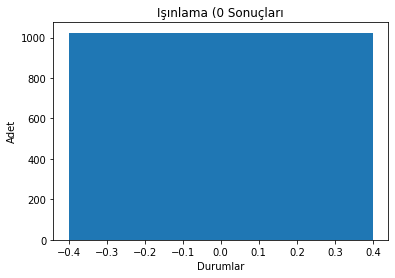

In [33]:
results = teleportation_test(durum="0", shots=1024)
pyplot.bar(results.keys(), results.values())
pyplot.title("Işınlama (0 Sonuçları")
pyplot.xlabel("Durumlar")
pyplot.ylabel("Adet")

0 (d=4): ───U───────@'───H───S─────────────
                    │        │
1 (d=4): ───H───@───X────────S─────────────
                │            │
2 (d=4): ───────X────────────S───M('qB')───


Text(0, 0.5, 'Adet')

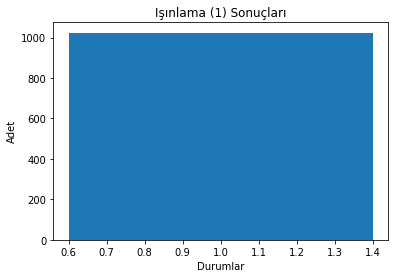

In [34]:
results = teleportation_test(durum="1", shots=1024)
pyplot.bar(results.keys(), results.values())
pyplot.title("Işınlama (1) Sonuçları")
pyplot.xlabel("Durumlar")
pyplot.ylabel("Adet")

0 (d=4): ───U───────@'───H───S─────────────
                    │        │
1 (d=4): ───H───@───X────────S─────────────
                │            │
2 (d=4): ───────X────────────S───M('qB')───


Text(0, 0.5, 'Adet')

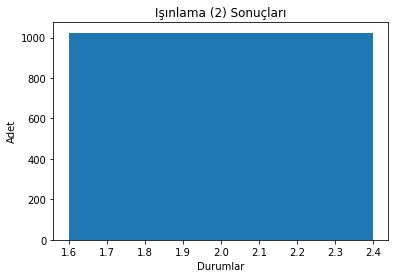

In [35]:
results = teleportation_test(durum="2", shots=1024)
pyplot.bar(results.keys(), results.values())
pyplot.title("Işınlama (2) Sonuçları")
pyplot.xlabel("Durumlar")
pyplot.ylabel("Adet")

0 (d=4): ───U───────@'───H───S─────────────
                    │        │
1 (d=4): ───H───@───X────────S─────────────
                │            │
2 (d=4): ───────X────────────S───M('qB')───


Text(0, 0.5, 'Adet')

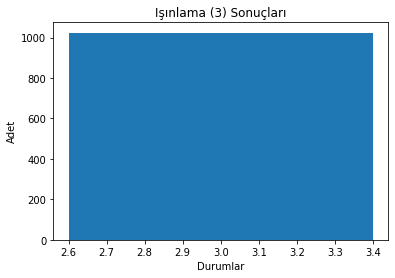

In [36]:
results = teleportation_test(durum="3", shots=1024)
pyplot.bar(results.keys(), results.values())
pyplot.title("Işınlama (3) Sonuçları")
pyplot.xlabel("Durumlar")
pyplot.ylabel("Adet")

0 (d=4): ───H───────@'───H───S─────────────
                    │        │
1 (d=4): ───H───@───X────────S─────────────
                │            │
2 (d=4): ───────X────────────S───M('qB')───


Text(0, 0.5, 'Adet')

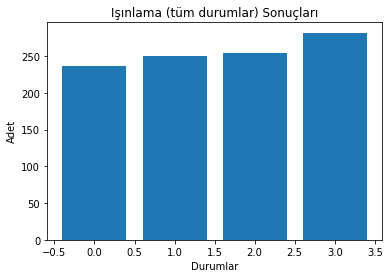

In [38]:
results = teleportation_test(durum="hepsi", shots=1024)
pyplot.bar(results.keys(), results.values())
pyplot.title("Işınlama (tüm durumlar) Sonuçları")
pyplot.xlabel("Durumlar")
pyplot.ylabel("Adet")